In [1]:
from scipy.integrate import nquad
from aggregate import *

### random

In [17]:
for i in range (10): print(i)

0
1
2
3
4
5
6
7
8
9


In [20]:
sum = 1

for i in range(61):
    sum += i

sum

1831

### graphing

In [6]:
n = 30

print('----- ana l2 -----')
ana_l2_errs = a.err_l2_calc(n, "ana")
print('----- ana linf -----')
ana_linf_errs = a.err_linf_calc(n, "ana")

print('----- num l2 -----')
num_l2_errs = a.err_l2_calc(n, "num")
print('----- num linf -----')
num_linf_errs = a.err_linf_calc(n, "num")

----- ana l2 -----
n: 0
n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
----- ana linf -----
n: 0
n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
----- num l2 -----
n: 0
n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30
----- num linf -----
n: 0
n: 1
n: 2
n: 3
n: 4
n: 5
n: 6
n: 7
n: 8
n: 9
n: 10
n: 11
n: 12
n: 13
n: 14
n: 15
n: 16
n: 17
n: 18
n: 19
n: 20
n: 21
n: 22
n: 23
n: 24
n: 25
n: 26
n: 27
n: 28
n: 29
n: 30


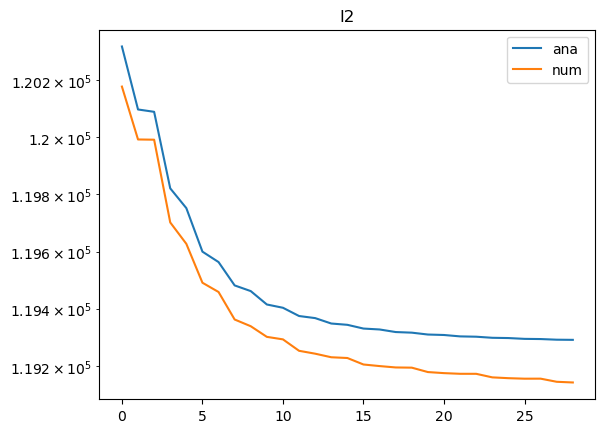

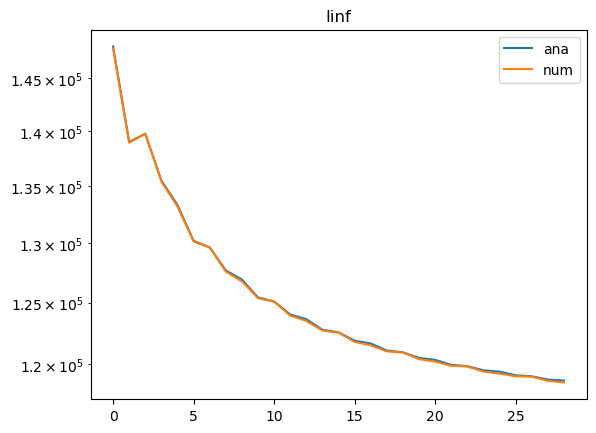

In [13]:
skip = 2

plt.title('l2')
plt.semilogy(ana_l2_errs[skip:], label='ana')
plt.semilogy(num_l2_errs[skip:], label='num')
plt.legend()
plt.show()

plt.title('linf')
plt.semilogy(ana_linf_errs[skip:], label='ana')
plt.semilogy(num_linf_errs[skip:], label='num')
plt.legend()
plt.show()

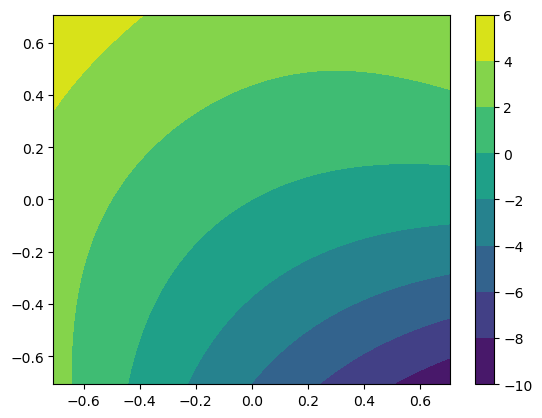

In [4]:
a = KApprox(4, 1, 2000)

x = a.x
y = a.y
z = base_input(x,y)

a.plotter(z)

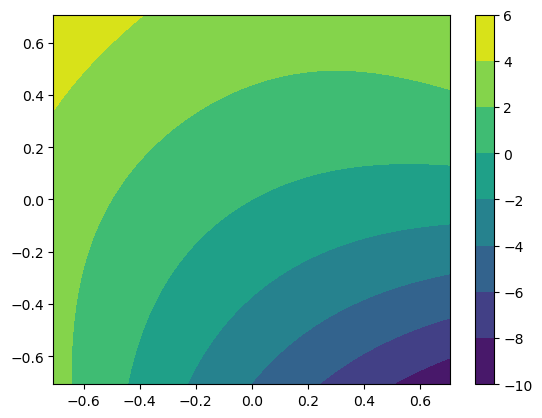

n: 0


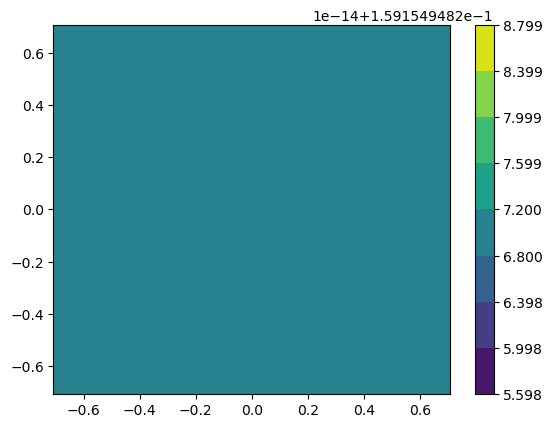

n: 1


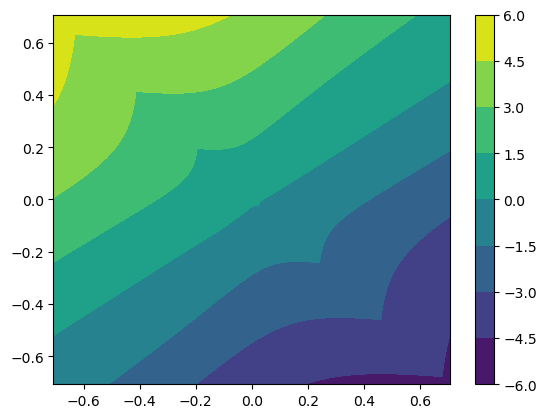

n: 2


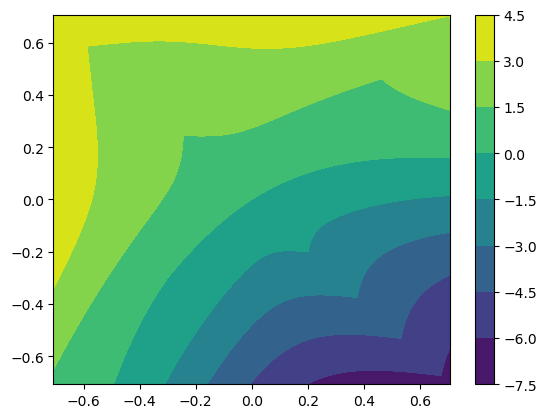

n: 3


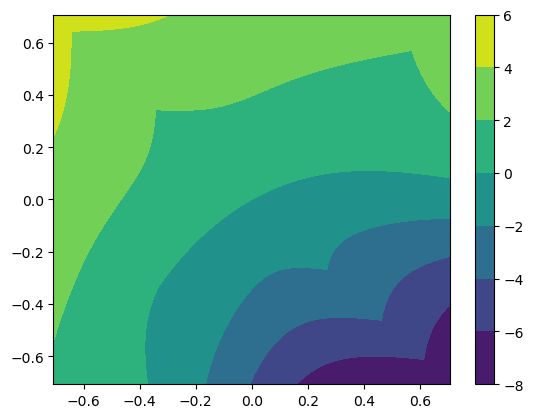

n: 4


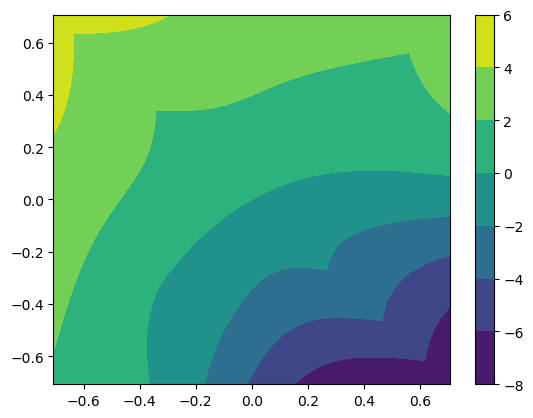

n: 5


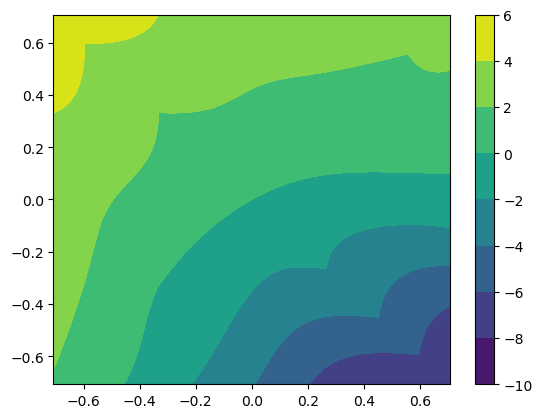

n: 6


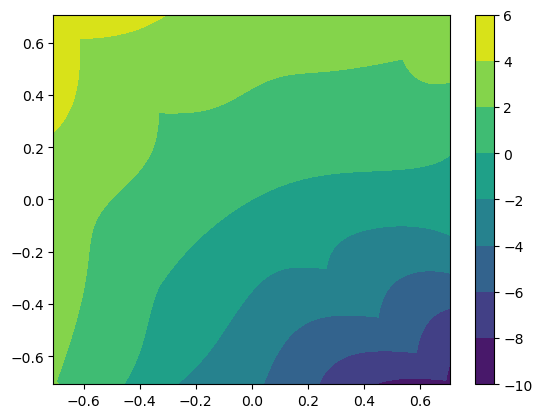

n: 7


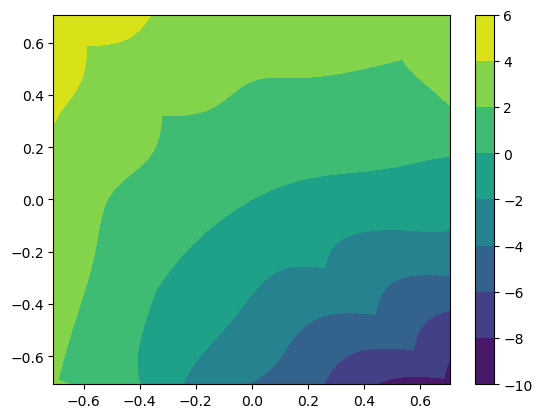

n: 8


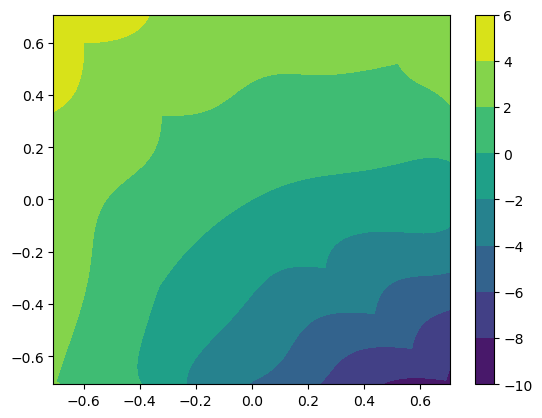

n: 9


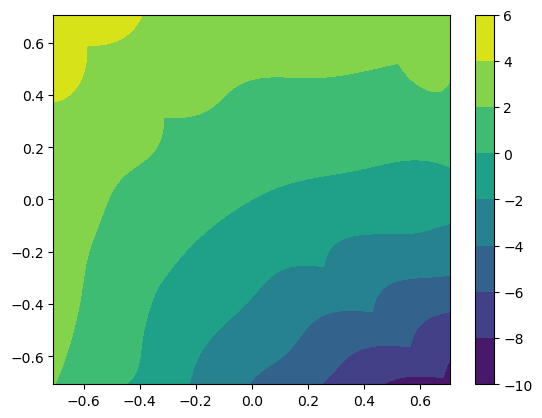

n: 10


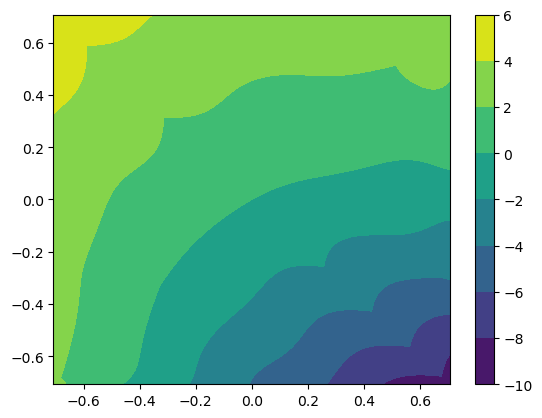

n: 11


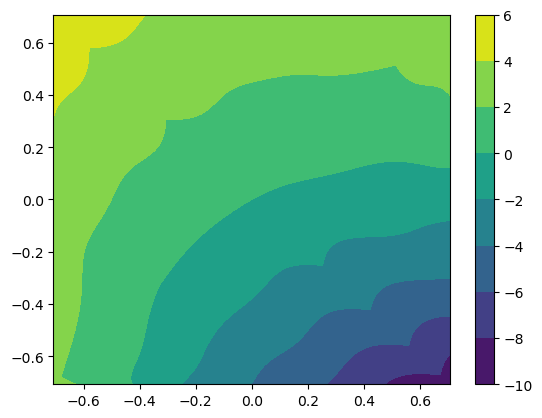

n: 12


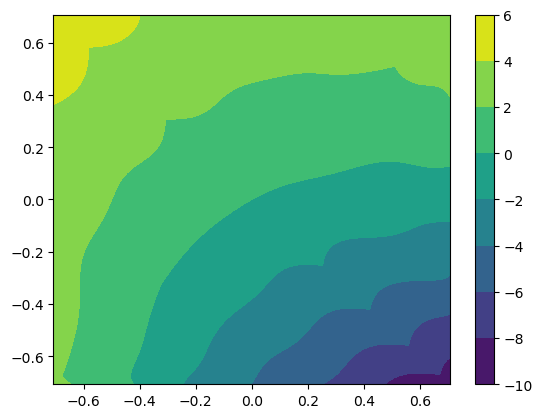

n: 13


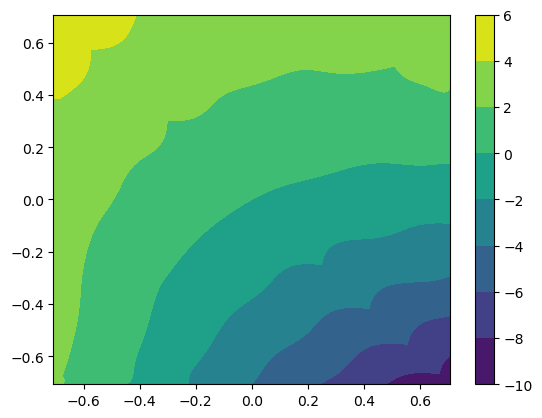

n: 14


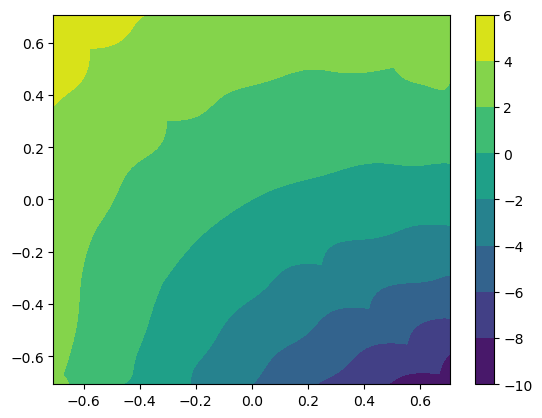

n: 15


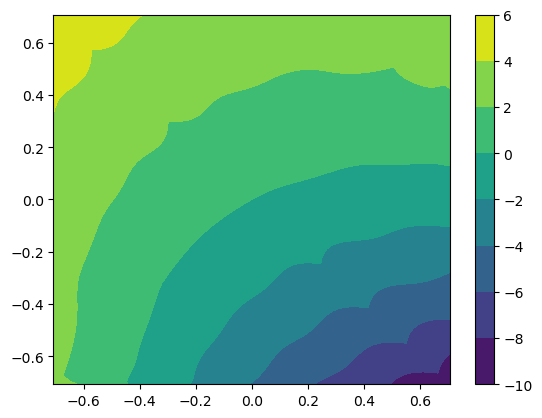

n: 16


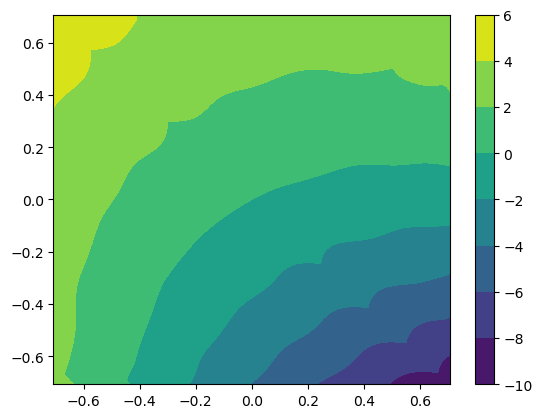

n: 17


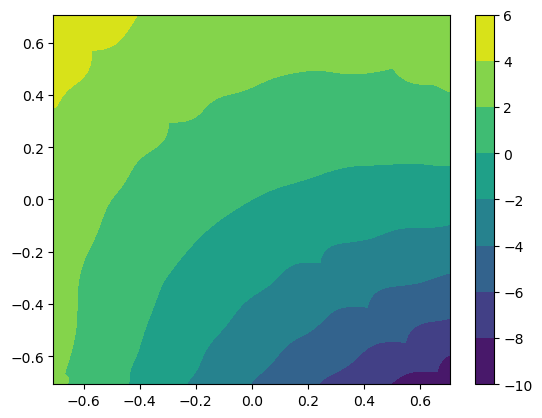

n: 18


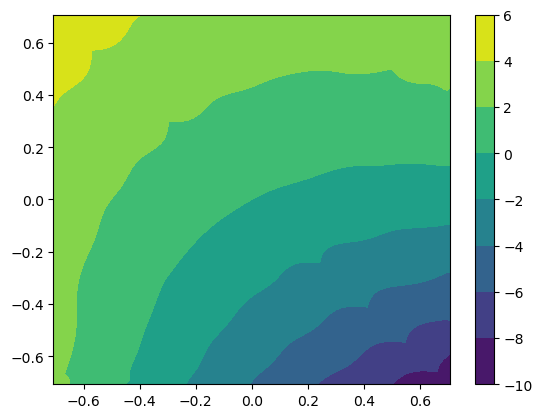

n: 19


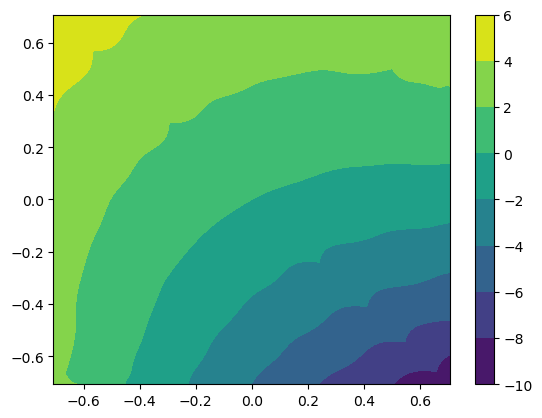

n: 20


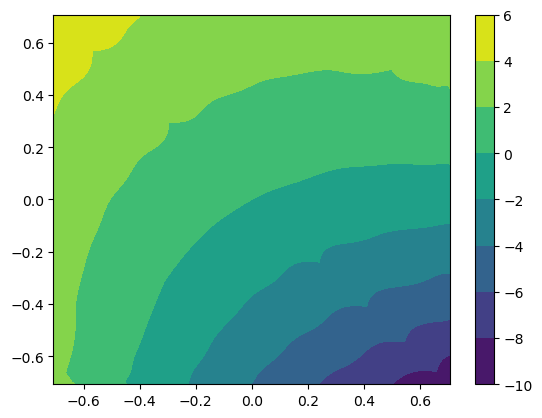

n: 21


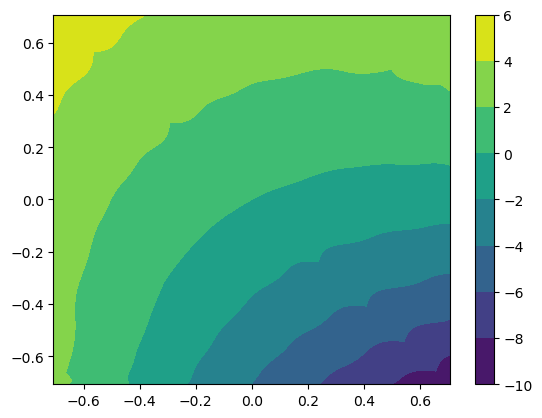

n: 22


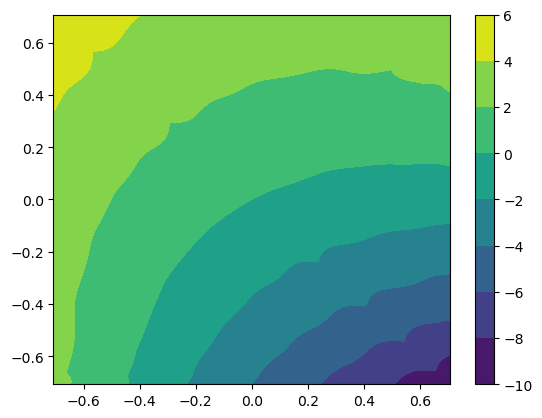

n: 23


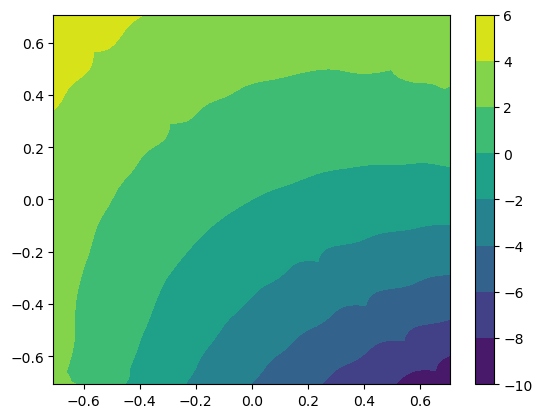

KeyboardInterrupt: 

In [3]:
a.plotter_k_each(30)

In [3]:
help(a)

Help on KApprox in module aggregate object:

class KApprox(ApproxParent)
 |  KApprox(num_sides, polygon_radius, mesh_size)
 |
 |  Method resolution order:
 |      KApprox
 |      ApproxParent
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, num_sides, polygon_radius, mesh_size)
 |      Parameters
 |      ----------
 |      num_sides : int
 |          number of sides on the regular polygon
 |      polygon_radius : float
 |          radius of the polygon
 |      mesh_side : int
 |          the number of elements used in the array used to
 |          generate the value of each basis vector
 |
 |  gen_coordinates(self, mesh_size)
 |      Generates the various coordinates needed for
 |      subsequent calculations.
 |
 |  gen_k_n(self, n, load_type)
 |      Generates the summed values of all K basis vectors
 |      given a specific n value.
 |
 |      Parameters
 |      ----------
 |      n : int
 |          Zernike order
 |      load_type : {"ana", "num"}, str
 | 

### scipy bounds

In [16]:
def f(x,y):
    return 1

def bounds_x():
    return [-1, 1]

def bounds_y(x):
    return [-1,1]#[-(1-x**2)**(1/2), (1-x**2)**(1/2)]

nquad(f, [bounds_y, bounds_x])[0]
#bounds_x

4.0

In [25]:
from scipy.integrate import nquad

class toy_class():
    def gen_bounds(self):
        def x_bounds():
            return [-1,1]

        def y_bounds(x):
            return [-1,1]
        
        return x_bounds, y_bounds

xb, yb = toy_class().gen_bounds()
f = lambda x, y: 1

nquad(f ,[yb, xb])

(4.0, 4.440892098500626e-14)

In [28]:
from scipy.integrate import nquad

class toy_class():
    def gen_bounds(self):
        def x_bounds(y):
            return [-1 , 1]

        def y_bounds():
            return [-1 , 1]

        return x_bounds, y_bounds

xb, yb = toy_class().gen_bounds()

nquad(lambda x, y: 1, [xb, yb])

(4.0, 4.440892098500626e-14)

### csv stuff

In [6]:
#data/ck_num_vs_ana.txt
import csv

# data
ck_n = []
ck_m = []
num_ck = []
ana_ck = []

with open('data/ck_num_vs_ana.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        ck_n.append(row[0])
        ck_m.append(row[1])
        num_ck.append(row[3])
        ana_ck.append(row[2])

In [49]:
for i in range(36,37):
    print(i)

36


In [46]:
# up to 36, -18
import numpy as np

ana_ck_dict = {}
num_ck_dict = {}

for n in range(36):
    ana_ck_m_dict = {}
    num_ck_m_dict = {}
    
    for m in np.arange(-n,n+1,2):
        ana_ck_m_dict[m] = 0
        num_ck_m_dict[m] = 0
    
    ana_ck_dict[n] = ana_ck_m_dict
    num_ck_dict[n] = num_ck_m_dict

In [54]:
for i in range(len(ck_n) - 10):
    n = int(ck_n[i])
    m = int(ck_m[i])

    ana_ck_dict[n][m] = float(ana_ck[i])
    num_ck_dict[n][m] = float(num_ck[i])

ana_ck_dict[0][0]

0.15915494824277174